In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download data for Apple, Samsung, and the NASDAQ-100 Technology Index
apple = yf.download('AAPL', start='2017-01-01', end='2023-12-31')
samsung = yf.download('005930.KS', start='2017-01-01', end='2023-12-31')
nasdaq_tech = yf.download('^NDXT', start='2017-01-01', end='2023-12-31')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
# Display the data
apple.head()
samsung.head()
nasdaq_tech.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2890.719971,2914.810059,2873.110107,2892.389893,2892.389893,0
2017-01-04,2896.489990,2907.840088,2892.010010,2902.199951,2902.199951,0
2017-01-05,2902.810059,2920.449951,2897.510010,2908.149902,2908.149902,0
2017-01-06,2910.080078,2935.360107,2896.790039,2930.179932,2930.179932,0
2017-01-09,2936.760010,2953.669922,2936.760010,2948.250000,2948.250000,0


In [4]:
# Summary Statistics
apple.describe()
samsung.describe()
nasdaq_tech.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000
mean,5919.689076,5974.599280,5862.906897,5921.967886,5921.967886,238896.306818
std,1869.251268,1889.641645,1847.008573,1869.565337,1869.565337,213352.610508
min,2890.719971,2907.840088,2873.110107,2892.389893,2892.389893,0.000000
25%,4273.557617,4302.892456,4242.167480,4278.322388,4278.322388,0.000000
50%,5797.244873,5844.405029,5722.885010,5771.054932,5771.054932,283650.000000
75%,7670.302612,7779.885010,7578.427368,7682.832642,7682.832642,407275.000000
max,9888.599609,9926.870117,9836.709961,9855.419922,9855.419922,841100.000000


In [5]:
# Question 1:How did Apple and Samsung’s stock prices trend before, during and after the Covid-19 pandemic?
# Extract the adjusted close price for Apple
apple_prices = apple['Adj Close']

# Extract the adjusted close price for Samsung
samsung_prices = samsung['Adj Close']

# Extract the adjusted close price for NASDAQ Technology Index
nasdaq_tech_prices = nasdaq_tech['Adj Close']


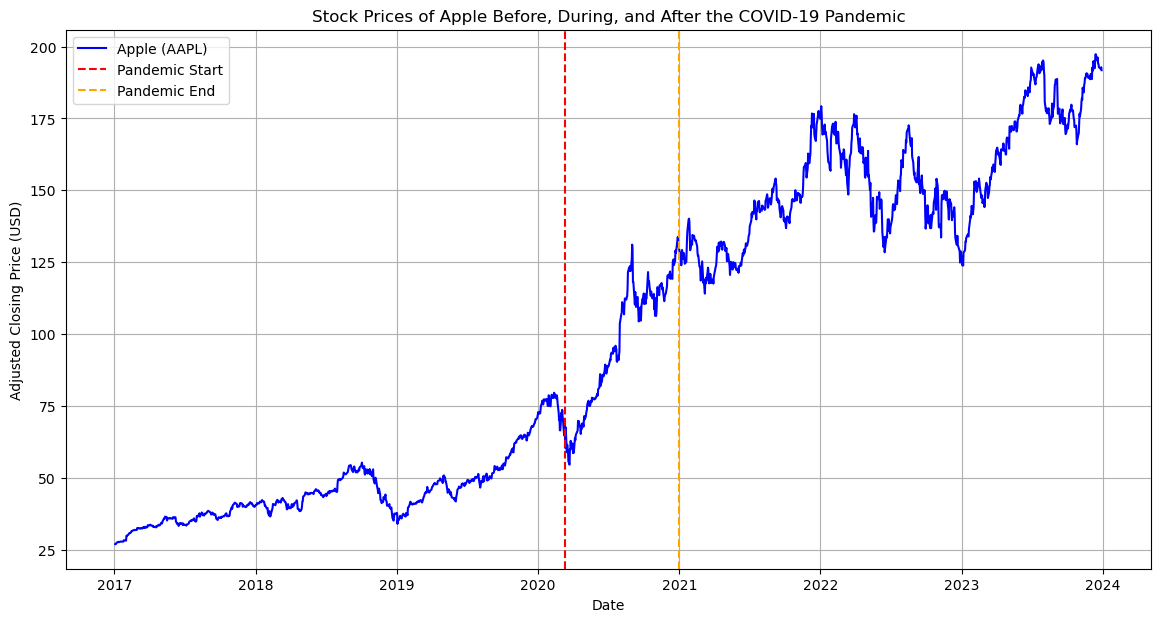

In [6]:
# Plotting the stock prices for Apple
plt.figure(figsize=(14, 7))

plt.plot(apple_prices, label='Apple (AAPL)', color='blue')


# Adding vertical lines for the pandemic period
plt.axvline(x=pd.Timestamp('2020-03-11'), color='red', linestyle='--', label='Pandemic Start')
plt.axvline(x=pd.Timestamp('2020-12-31'), color='orange', linestyle='--', label='Pandemic End')

# Formatting the plot
plt.title('Stock Prices of Apple Before, During, and After the COVID-19 Pandemic')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.grid()
plt.savefig('plot_1')
plt.show()


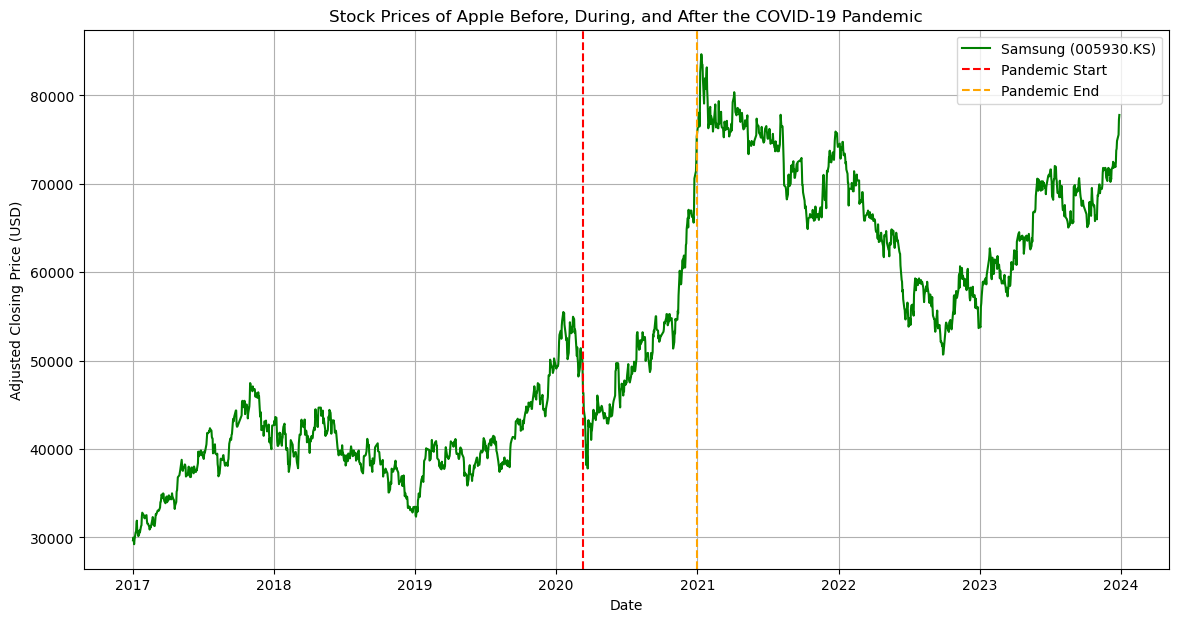

In [7]:
# Plotting the stock prices for Samsung
plt.figure(figsize=(14, 7))


plt.plot(samsung_prices, label='Samsung (005930.KS)', color='green')

# Adding vertical lines for the pandemic period
plt.axvline(x=pd.Timestamp('2020-03-11'), color='red', linestyle='--', label='Pandemic Start')
plt.axvline(x=pd.Timestamp('2020-12-31'), color='orange', linestyle='--', label='Pandemic End')

# Formatting the plot
plt.title('Stock Prices of Apple Before, During, and After the COVID-19 Pandemic')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.legend()
plt.grid()
plt.savefig('plot_2')
plt.show()


In [9]:
# Questioin 2:Did the trading volume of Apple and Samsung increase or decrease during the pandemic?
apple.reset_index(inplace=True)
samsung.reset_index(inplace=True)


In [10]:
merged_df = pd.merge(apple, samsung, on="Date", suffixes=('_AAPL', '_SAMSUNG'))
merged_df

,index_AAPL,Date,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,index_SAMSUNG,Open_SAMSUNG,High_SAMSUNG,Low_SAMSUNG,Close_SAMSUNG,Adj Close_SAMSUNG,Volume_SAMSUNG
0,0,2017-01-03,28.950001,29.082500,28.690001,29.037500,26.921549,115127600,1,36280.0,36620.0,36020.0,36480.0,29992.845703,7357650
1,1,2017-01-04,28.962500,29.127501,28.937500,29.004999,26.891411,84472400,2,36500.0,36520.0,36100.0,36160.0,29729.755859,7971750
2,2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.028168,88774400,3,36060.0,36060.0,35540.0,35560.0,29236.447266,10967450
3,3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.329485,127007600,4,36180.0,36440.0,36040.0,36200.0,29762.638672,8880950
4,4,2017-01-09,29.487499,29.857500,29.485001,29.747499,27.579809,134247600,5,36600.0,37500.0,36560.0,37220.0,30601.251953,13194900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,1754,2023-12-21,196.100006,197.080002,193.500000,194.679993,193.944031,46482500,1711,74600.0,75000.0,74300.0,75000.0,73978.890625,13478766
1657,1755,2023-12-22,195.179993,195.410004,192.970001,193.600006,192.868149,37122800,1712,75800.0,76300.0,75400.0,75900.0,74866.640625,14515608
1658,1756,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.320221,28919300,1713,76100.0,76700.0,75700.0,76600.0,75557.109375,13164909
1659,1757,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.419830,48087700,1714,76700.0,78000.0,76500.0,78000.0,77302.359375,20651042


In [11]:
# convert our "Date" column into a datetime format.
merged_df["Date"] = pd.to_datetime(merged_df["Date"], format="%m/%d/%y", errors='coerce')

#set our specific dates 
start_date = "1-1-2020"
end_date = "12-31-2021"

#Filter our data showing the pandemic period

pandemic_data_df = merged_df[(merged_df["Date"] >= start_date) & (merged_df["Date"] <= end_date)]
pandemic_data_df
#pandemic_data_df = merged_df[(merged_df["Date"] >= start_date) & (merged_df["Date"] <= end_date)]

,index_AAPL,Date,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,index_SAMSUNG,Open_SAMSUNG,High_SAMSUNG,Low_SAMSUNG,Close_SAMSUNG,Adj Close_SAMSUNG,Volume_SAMSUNG
708,754,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876122,135480400,731,55500.0,56000.0,55000.0,55200.0,49099.425781,12993228
709,755,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800,732,56000.0,56600.0,54900.0,55500.0,49366.265625,15422255
710,756,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742676,118387200,733,54900.0,55600.0,54600.0,55500.0,49366.265625,10278951
711,757,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000,734,55700.0,56400.0,55600.0,55800.0,49633.109375,10009778
712,758,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565186,132079200,735,56200.0,57400.0,55900.0,56800.0,50522.585938,23501171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,1253,2021-12-23,175.850006,176.850006,175.270004,176.279999,173.629745,68356600,1221,79800.0,80000.0,79300.0,79900.0,75358.906250,13577498
1185,1254,2021-12-27,177.089996,180.419998,177.070007,180.330002,177.618881,74919600,1223,80600.0,80600.0,79800.0,80200.0,75641.851562,10783368
1186,1255,2021-12-28,180.160004,181.330002,178.529999,179.289993,176.594528,79144300,1224,80200.0,80400.0,79700.0,80300.0,75736.171875,18226325
1187,1256,2021-12-29,179.330002,180.630005,178.139999,179.380005,176.683167,62348900,1225,80200.0,80200.0,78500.0,78800.0,74657.070312,19794795


In [12]:
# We want to firgure out our trading volume

# Reset the index and drop the old index column
pandemic_data_df = pandemic_data_df.reset_index(drop=True)

#assign our ticker values
ticker = ["KRW"] * (len(pandemic_data_df) // 2) + ["USD"] * (len(pandemic_data_df) - (len(pandemic_data_df) // 2))

# use .loc indexer to assign the new Ticker values.
pandemic_data_df.loc[:, "ticker"] = ticker
 
# Group our data
volume_data_df = pandemic_data_df.groupby("ticker")[["Volume_AAPL", "Volume_SAMSUNG"]].sum().reset_index()

(volume_data_df)

,ticker,Volume_AAPL,Volume_SAMSUNG
0,KRW,38033646800,5260876748
1,USD,21885462600,4538987777


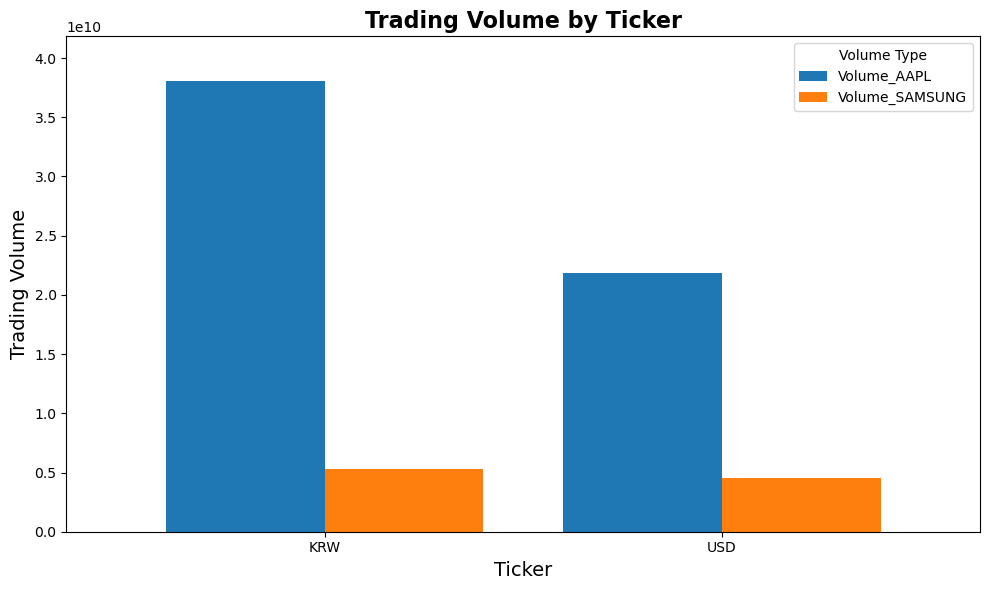

In [13]:
# Data Visualization

# set my index to the ticker
volume_data_df.set_index('ticker', inplace=True)

#plot our data 
volume_data_df[['Volume_AAPL', 'Volume_SAMSUNG']].plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'], width=0.8)

# Title and labels
plt.title('Trading Volume by Ticker', fontsize=16, fontweight='bold')
plt.xlabel('Ticker', fontsize=14)
plt.ylabel('Trading Volume', fontsize=14)
plt.legend(title='Volume Type')

 
#include x-ticks
plt.xticks(rotation=0)


plt.ylim(0, volume_data_df[['Volume_AAPL', 'Volume_SAMSUNG']].max().max() * 1.1)

plt.tight_layout()
plt.show()

In [33]:
# Question 3:How long did it take for apple and Samsung to reach to pre pandemic levels?
# Download data for Apple and Samsung
# Download Apple and Samsung stock data from their pre-Pandemic High Onwards
apple = yf.download('AAPL', start='2020-03-04')
samsung = yf.download('005930.KS', start='2020-02-14')

# Define the pre-pandemic price
pre_pandemic_apple_price = apple['Close'].iloc[0]
pre_pandemic_samsung_price = samsung['Close'].iloc[0]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [34]:
# Find the date when Apple stock reached pre-pandemic levels
apple_recovery_date = apple[apple['Open'] >= pre_pandemic_apple_price].index[0]

# Find the date when Samsung stock reached pre-pandemic levels
samsung_recovery_date = samsung[samsung['Open'] >= pre_pandemic_samsung_price].index[0]

print(f"Apple reached pre-pandemic levels on: {apple_recovery_date.date()}")
print(f"Samsung reached pre-pandemic levels on: {samsung_recovery_date.date()}")

Apple reached pre-pandemic levels on: 2020-05-07
Samsung reached pre-pandemic levels on: 2020-11-16


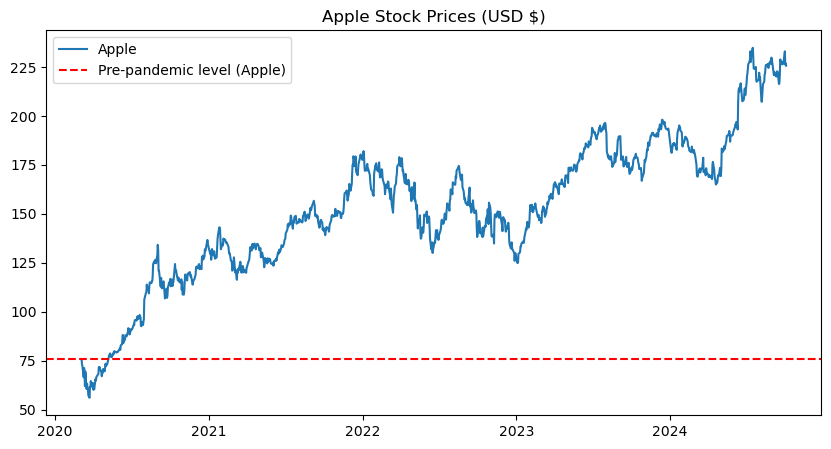

In [35]:
# Plotting Apple stock prices
plt.figure(figsize=(10, 5))
plt.plot(apple['Close'], label='Apple')
plt.axhline(pre_pandemic_apple_price, color='r', linestyle='--', label='Pre-pandemic level (Apple)')
plt.title('Apple Stock Prices (USD $)')
plt.legend()
plt.savefig('q3_AAPL_plot.png')
plt.show()

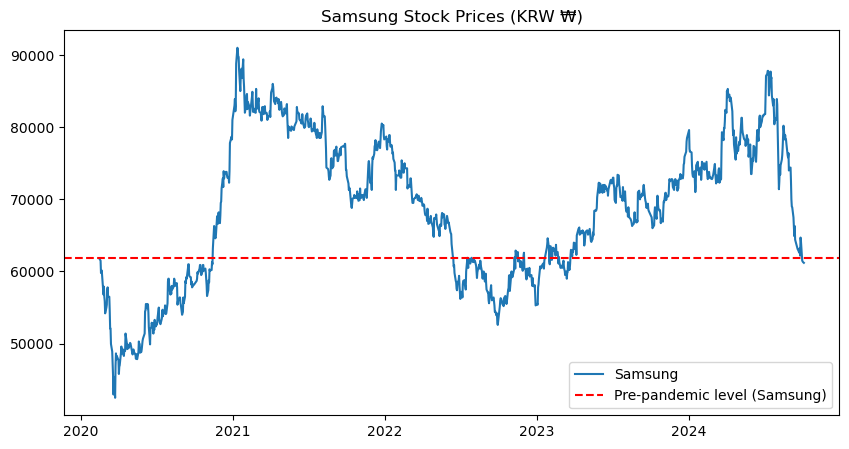

In [36]:
# Plotting Samsung stock prices
plt.figure(figsize=(10, 5))
plt.plot(samsung['Close'], label='Samsung')
plt.axhline(pre_pandemic_samsung_price, color='r', linestyle='--', label='Pre-pandemic level (Samsung)')
plt.title('Samsung Stock Prices (KRW ₩)')
plt.legend()
plt.savefig('q3_005930KS_plot.png')
plt.show()

In [44]:
# Question 4:How did Apple and Samsung perform compared to the overall technology sector during the pandemic?
# Download data
apple = yf.download('AAPL', start='2017-01-01', end='2023-12-31')
samsung = yf.download('005930.KS', start='2017-01-01', end='2023-12-31')
nasdaq_tech = yf.download('^NDXT', start='2017-01-01', end='2023-12-31')
# Calculate daily returns
apple['Daily Return'] = apple['Adj Close'].pct_change()
samsung['Daily Return'] = samsung['Adj Close'].pct_change()
nasdaq_tech['Daily Return'] = nasdaq_tech['Adj Close'].pct_change()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [45]:
apple[['Adj Close', 'Daily Return']].head()
samsung[['Adj Close', 'Daily Return']].head()
nasdaq_tech[['Adj Close', 'Daily Return']].head()

,Adj Close,Daily Return
Date,,
2017-01-03,2892.389893,NaN
2017-01-04,2902.199951,0.003392
2017-01-05,2908.149902,0.002050
2017-01-06,2930.179932,0.007575
2017-01-09,2948.250000,0.006167


In [46]:
# Normalize prices for comparison
apple['Normalized Price'] = apple['Adj Close'] / apple['Adj Close'].iloc[0]
samsung['Normalized Price'] = samsung['Adj Close'] / samsung['Adj Close'].iloc[0]
nasdaq_tech['Normalized Price'] = nasdaq_tech['Adj Close'] / nasdaq_tech['Adj Close'].iloc[0]

In [47]:
apple[['Adj Close', 'Normalized Price']].head()
samsung[['Adj Close', 'Normalized Price']].head()
nasdaq_tech[['Adj Close', 'Normalized Price']].head()

,Adj Close,Normalized Price
Date,,
2017-01-03,2892.389893,1.000000
2017-01-04,2902.199951,1.003392
2017-01-05,2908.149902,1.005449
2017-01-06,2930.179932,1.013065
2017-01-09,2948.250000,1.019313


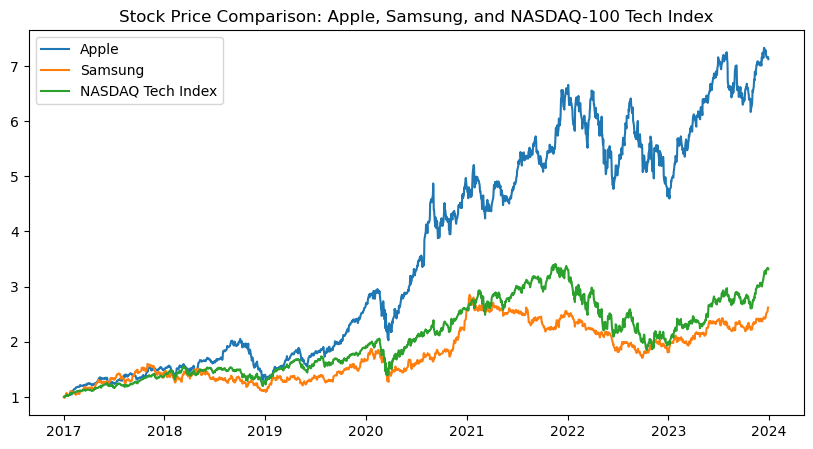

In [48]:
# Plot normalized stock prices for comparison
plt.figure(figsize=(10,5))
plt.plot(apple['Normalized Price'], label='Apple')
plt.plot(samsung['Normalized Price'], label='Samsung')
plt.plot(nasdaq_tech['Normalized Price'], label='NASDAQ Tech Index')
plt.title('Stock Price Comparison: Apple, Samsung, and NASDAQ-100 Tech Index')
plt.legend()
plt.savefig('plot1_Q4.png')
plt.show()

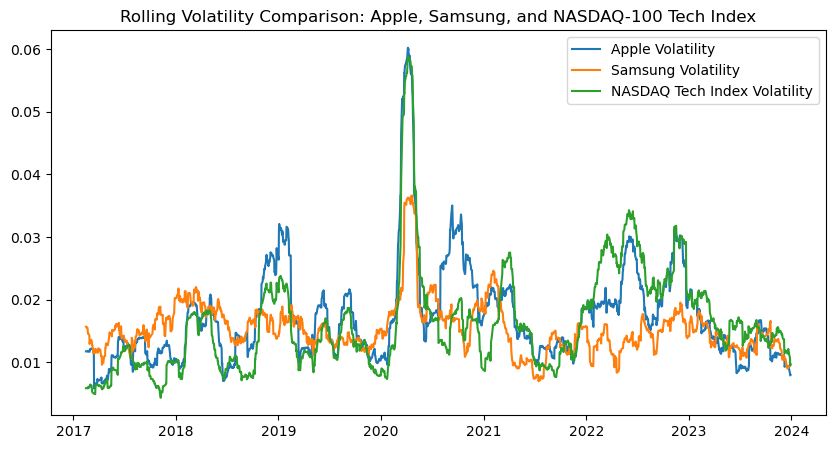

In [49]:
apple['Volatility'] = apple['Daily Return'].rolling(window=30).std()
samsung['Volatility'] = samsung['Daily Return'].rolling(window=30).std()
nasdaq_tech['Volatility'] = nasdaq_tech['Daily Return'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(10,5))
plt.plot(apple['Volatility'], label='Apple Volatility')
plt.plot(samsung['Volatility'], label='Samsung Volatility')
plt.plot(nasdaq_tech['Volatility'], label='NASDAQ Tech Index Volatility')
plt.title('Rolling Volatility Comparison: Apple, Samsung, and NASDAQ-100 Tech Index')
plt.legend()
plt.savefig('plot2_Q4.png')
plt.show()

In [51]:
# Function to calculate percentage change
def percentage_change(start, end):
    return ((end - start) / start) * 100

# Calculate growth over the entire time period (first price to last price)
apple_growth = percentage_change(apple_prices.iloc[0], apple_prices.iloc[-1])
samsung_growth = percentage_change(samsung_prices.iloc[0], samsung_prices.iloc[-1])
tech_sector_growth = percentage_change(nasdaq_tech_prices.iloc[0], nasdaq_tech_prices.iloc[-1])

print(f"Apple Growth: {apple_growth}%")
print(f"Samsung Growth: {samsung_growth}%")
print(f"Tech Sector Growth: {tech_sector_growth}%")


Apple Growth: 612.4486472983162%
Samsung Growth: 162.11854721151937%
Tech Sector Growth: 231.48781035632888%


In [52]:
# Question 5:Was there an increase in stock price volatility for Apple and Samsung during the pandemic compared to pre – Covid period?
#  Download stock price data
apple = yf.download('AAPL', start='2017-01-01', end='2023-12-31')
samsung = yf.download('005930.KS', start='2017-01-01', end='2023-12-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [53]:
#  Calculate daily returns
apple['Returns'] = apple['Adj Close'].pct_change()
samsung['Returns'] = samsung['Adj Close'].pct_change()

In [54]:
#  Define pre-Covid and Covid periods
pre_covid_start = '2017-01-01'
pre_covid_end = '2020-01-31'
covid_start = '2020-02-01'
covid_end = '2023-12-31'

In [55]:
# Separate data into periods
apple_pre_covid = apple[pre_covid_start:pre_covid_end]
apple_covid = apple[covid_start:covid_end]

samsung_pre_covid = samsung[pre_covid_start:pre_covid_end]
samsung_covid = samsung[covid_start:covid_end]

In [56]:
#  Calculate volatility (standard deviation of daily returns)
apple_pre_covid_vol = apple_pre_covid['Returns'].std() * np.sqrt(252)  # Annualized volatility
apple_covid_vol = apple_covid['Returns'].std() * np.sqrt(252)
samsung_pre_covid_vol = samsung_pre_covid['Returns'].std() * np.sqrt(252)
samsung_covid_vol = samsung_covid['Returns'].std() * np.sqrt(252)

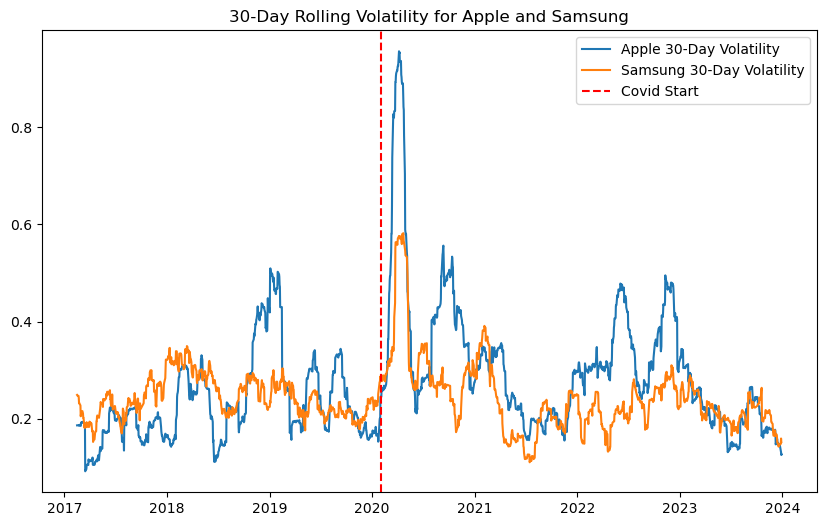

In [57]:
#  Plot volatility changes
plt.figure(figsize=(10,6))
plt.plot(apple.index, apple['Returns'].rolling(window=30).std() * np.sqrt(252), label='Apple 30-Day Volatility')
plt.plot(samsung.index, samsung['Returns'].rolling(window=30).std() * np.sqrt(252), label='Samsung 30-Day Volatility')
plt.axvline(pd.Timestamp('2020-02-01'), color='red', linestyle='--', label='Covid Start')
plt.title('30-Day Rolling Volatility for Apple and Samsung')
plt.legend()
plt.savefig('plot1_Q5.png')
plt.show()

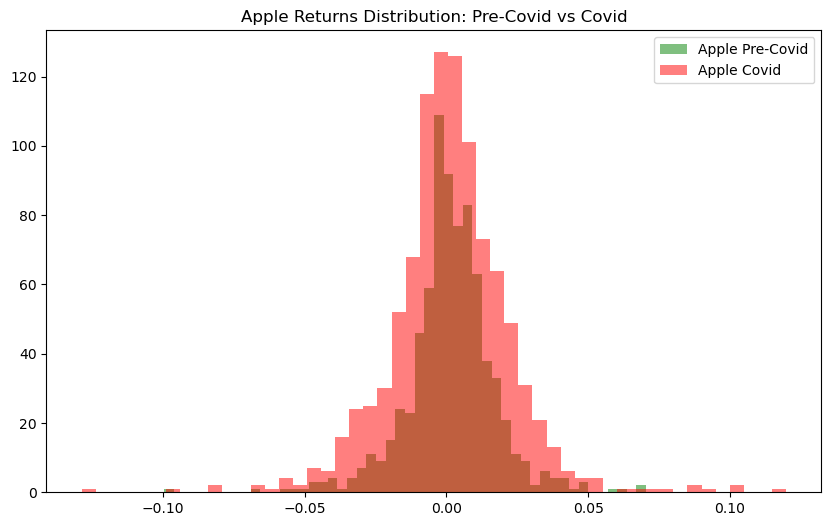

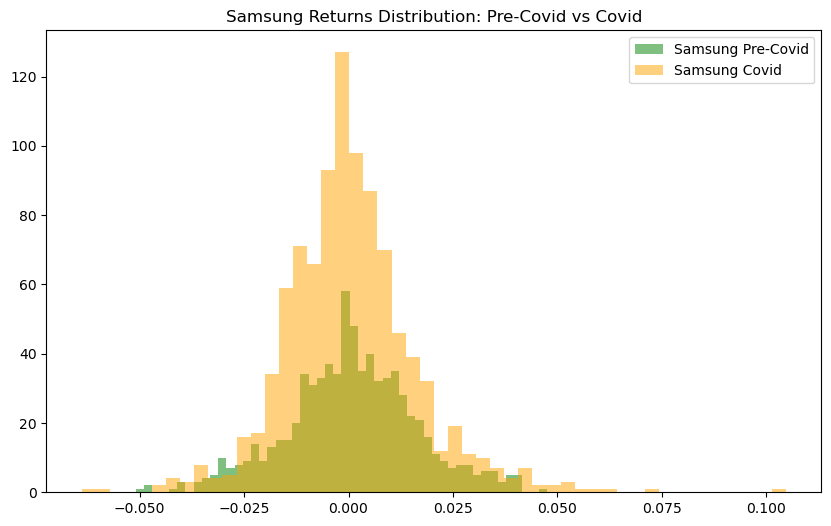

In [58]:
# Histogram of returns for Apple
plt.figure(figsize=(10,6))
plt.hist(apple_pre_covid['Returns'], bins=50, alpha=0.5, label='Apple Pre-Covid', color='green')
plt.hist(apple_covid['Returns'], bins=50, alpha=0.5, label='Apple Covid', color='red')
plt.title('Apple Returns Distribution: Pre-Covid vs Covid')
plt.legend()
plt.savefig('plot2_Q5.png')
plt.show()

# Histogram of returns for Samsung
plt.figure(figsize=(10,6))
plt.hist(samsung_pre_covid['Returns'], bins=50, alpha=0.5, label='Samsung Pre-Covid', color='green')
plt.hist(samsung_covid['Returns'], bins=50, alpha=0.5, label='Samsung Covid', color='orange')
plt.title('Samsung Returns Distribution: Pre-Covid vs Covid')
plt.legend()
plt.savefig('plot3_Q5.png')
plt.show()

In [ ]:
# Q6:Which phone company performed best before, during and after the pandemic?


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Load a CSV File containing data on the market share of the American Smartphone Market from 2016-2024
df = pd.read_csv('/Users/vinaymadhugiri/Desktop/Data Science Bootcamp/stock-Analysis_t2/us_smartphone_market_16_24.csv')

# Remove any unnecessary columns
df_clean = df.drop(columns=['Unnamed: 11']).iloc[:-1]

print(df_clean.head())

In [ ]:
# Convert the 'Quarter' column into a more usable format (Period for quarters)
def convert_quarter_to_date(quarter_str):
    year = int(quarter_str.split("'")[1])
    quarter = int(quarter_str.split("'")[0].strip()[-1])
    return pd.Period(year=2000 + year, freq='Q')

df_clean['Quarter'] = df_clean['Quarter'].apply(convert_quarter_to_date)

In [ ]:
# Filter the data for the two periods: Q1 2017 - Q4 2019 and Q1 2021 - Q4 2023
mask_17_19 = (df_clean['Quarter'] >= pd.Period('2017Q1')) & (df_clean['Quarter'] <= pd.Period('2019Q4'))
mask_21_23 = (df_clean['Quarter'] >= pd.Period('2021Q1')) & (df_clean['Quarter'] <= pd.Period('2023Q4'))

In [ ]:
# Calculate the average market share for each company during these periods
avg_17_19 = df_clean[mask_17_19].drop(columns=['Quarter']).mean()
avg_21_23 = df_clean[mask_21_23].drop(columns=['Quarter']).mean()

In [ ]:
# Print the results
print("Average market share between Q1 2017 and Q4 2019:")
print(avg_17_19)

print("\nAverage market share between Q1 2021 and Q4 2023:")
print(avg_21_23)

In [ ]:
# Data for the first period (Q1 2017 - Q4 2019)
labels = avg_17_19.index
sizes_17_19 = avg_17_19.values

# Data for the second period (Q1 2021 - Q4 2023)
sizes_21_23 = avg_21_23.values

# Function to combine small slices into "Other"
def combine_small_slices(labels, sizes, threshold=1):
    new_labels = []
    new_sizes = []
    other_size = 0
    
    for label, size in zip(labels, sizes):
        if size < threshold:
            other_size += size
        else:
            new_labels.append(label)
            new_sizes.append(size)
    
    if other_size > 0:
        new_labels.append('Other')
        new_sizes.append(other_size)
    
    return new_labels, new_sizes

# Combine small slices for decluttering
labels_17_19, sizes_17_19 = combine_small_slices(avg_17_19.index, avg_17_19.values)
labels_21_23, sizes_21_23 = combine_small_slices(avg_21_23.index, avg_21_23.values)

# Define a limited color palette
colors = plt.get_cmap('tab10').colors

In [ ]:
# Plotting pie chart for Q1 2017 - Q4 2019
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(sizes_17_19, labels=labels_17_19, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)
plt.title('Market Share: Q1 2017 - Q4 2019')
plt.savefig('Q1_17toQ4_19.png')
plt.show()

In [ ]:
# Plotting pie chart for Q1 2021 - Q4 2023
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.pie(sizes_21_23, labels=labels_21_23, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)
plt.title('Market Share: Q1 2021 - Q4 2023')
plt.savefig('Q1_21toQ4_23.png')
plt.show()

In [ ]:
# Filter the data for the period Q1 2017 - Q4 2023
mask = (df_clean['Quarter'] >= pd.Period('2017Q1')) & (df_clean['Quarter'] <= pd.Period('2023Q4'))
df_filtered = df_clean[mask]

In [ ]:
# Set the 'Quarter' column as the index for plotting
df_filtered.set_index('Quarter', inplace=True)
# Plot a stacked bar chart
df_filtered.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
plt.title('Smartphone Market Share: Q1 2017 - Q4 2023')
plt.ylabel('Market Share (%)')
plt.xlabel('Quarter')
plt.legend(title='Companies', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Marketshare.png')
plt.show()